In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

In [3]:
# Load the dataset
df = pd.read_csv('final_dataset.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (6840, 40)

First few rows:
   Unnamed: 0      Date  HomeTeam       AwayTeam  FTHG  FTAG FTR  HTGS  ATGS  \
0           0  19/08/00  Charlton       Man City     4     0   H     0     0   
1           1  19/08/00   Chelsea       West Ham     4     2   H     0     0   
2           2  19/08/00  Coventry  Middlesbrough     1     3  NH     0     0   
3           3  19/08/00     Derby    Southampton     2     2  NH     0     0   
4           4  19/08/00     Leeds        Everton     2     0   H     0     0   

   HTGC  ...  HTLossStreak3  HTLossStreak5  ATWinStreak3 ATWinStreak5  \
0     0  ...              0              0             0            0   
1     0  ...              0              0             0            0   
2     0  ...              0              0             0            0   
3     0  ...              0              0             0            0   
4     0  ...              0              0             0            0   

  ATLossStreak3 ATLossStreak5 HTGD AT

In [4]:
# Data Preprocessing and Target Variable Creation
# Create target variable: 1 if Home Team wins (H), 0 otherwise
df['HomeWin'] = (df['FTR'] == 'H').astype(int)

print("Target variable distribution:")
print(df['HomeWin'].value_counts())
print(f"\nHome Win Rate: {df['HomeWin'].mean():.2%}")

# Select relevant features for the model
feature_columns = ['HS', 'AS', 'HST', 'AST', 'HHW', 'AHW', 'HC', 'AC', 
                   'HF', 'AF', 'HFKC', 'AFKC', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR']

# Check which features are available
available_features = [col for col in feature_columns if col in df.columns]
print(f"\nAvailable features: {len(available_features)}")
print(available_features)

Target variable distribution:
HomeWin
0    3664
1    3176
Name: count, dtype: int64

Home Win Rate: 46.43%

Available features: 0
[]


In [5]:
# Display all columns in dataset
print("All available columns:")
print(df.columns.tolist())

All available columns:
['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'HomeWin']


In [6]:
# Feature Engineering and Selection
# Select features for the model (excluding identifiers and target)
X = df[['HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HTGD', 'ATGD', 
         'DiffPts', 'DiffFormPts', 'HTWinStreak3', 'ATWinStreak3',
         'HTWinStreak5', 'ATWinStreak5', 'HTLossStreak3', 'ATLossStreak3',
         'HTLossStreak5', 'ATLossStreak5']]

y = df['HomeWin']

# Handle missing values
print("Missing values in features:")
print(X.isnull().sum())

# Fill missing values with median
X_filled = X.fillna(X.median())

print("\nFeature statistics:")
print(X_filled.describe())

Missing values in features:
HTGS             0
ATGS             0
HTGC             0
ATGC             0
HTP              0
ATP              0
HTGD             0
ATGD             0
DiffPts          0
DiffFormPts      0
HTWinStreak3     0
ATWinStreak3     0
HTWinStreak5     0
ATWinStreak5     0
HTLossStreak3    0
ATLossStreak3    0
HTLossStreak5    0
ATLossStreak5    0
dtype: int64

Feature statistics:
              HTGS         ATGS         HTGC         ATGC          HTP  \
count  6840.000000  6840.000000  6840.000000  6840.000000  6840.000000   
mean     24.416667    24.514327    24.497807    24.347515     1.209014   
std      17.178524    17.136894    16.401571    16.341557     0.530186   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      11.000000    11.000000    11.000000    11.000000     0.888889   
50%      23.000000    23.000000    23.000000    23.000000     1.172414   
75%      35.000000    35.000000    36.000000    36.000000     1.555556   
max 

In [7]:
# Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_filled, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set size: 5472
Testing set size: 1368

Class distribution in training set:
HomeWin
0    0.535636
1    0.464364
Name: proportion, dtype: float64


In [8]:
# Train multiple models
print("="*60)
print("LOGISTIC REGRESSION")
print("="*60)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, lr_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, lr_pred_proba):.4f}")

print("\n" + "="*60)
print("RANDOM FOREST")
print("="*60)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, rf_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, rf_pred_proba):.4f}")

print("\n" + "="*60)
print("GRADIENT BOOSTING")
print("="*60)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, gb_pred):.4f}")
print(f"Precision: {precision_score(y_test, gb_pred):.4f}")
print(f"Recall: {recall_score(y_test, gb_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, gb_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, gb_pred_proba):.4f}")

LOGISTIC REGRESSION
Accuracy: 0.6338
Precision: 0.6279
Recall: 0.5181
F1 Score: 0.5677
ROC AUC: 0.6937

RANDOM FOREST
Accuracy: 0.6235
Precision: 0.6163
Recall: 0.5008
F1 Score: 0.5526
ROC AUC: 0.6513

GRADIENT BOOSTING
Accuracy: 0.6323
Precision: 0.6358
Recall: 0.4866
F1 Score: 0.5513
ROC AUC: 0.6823


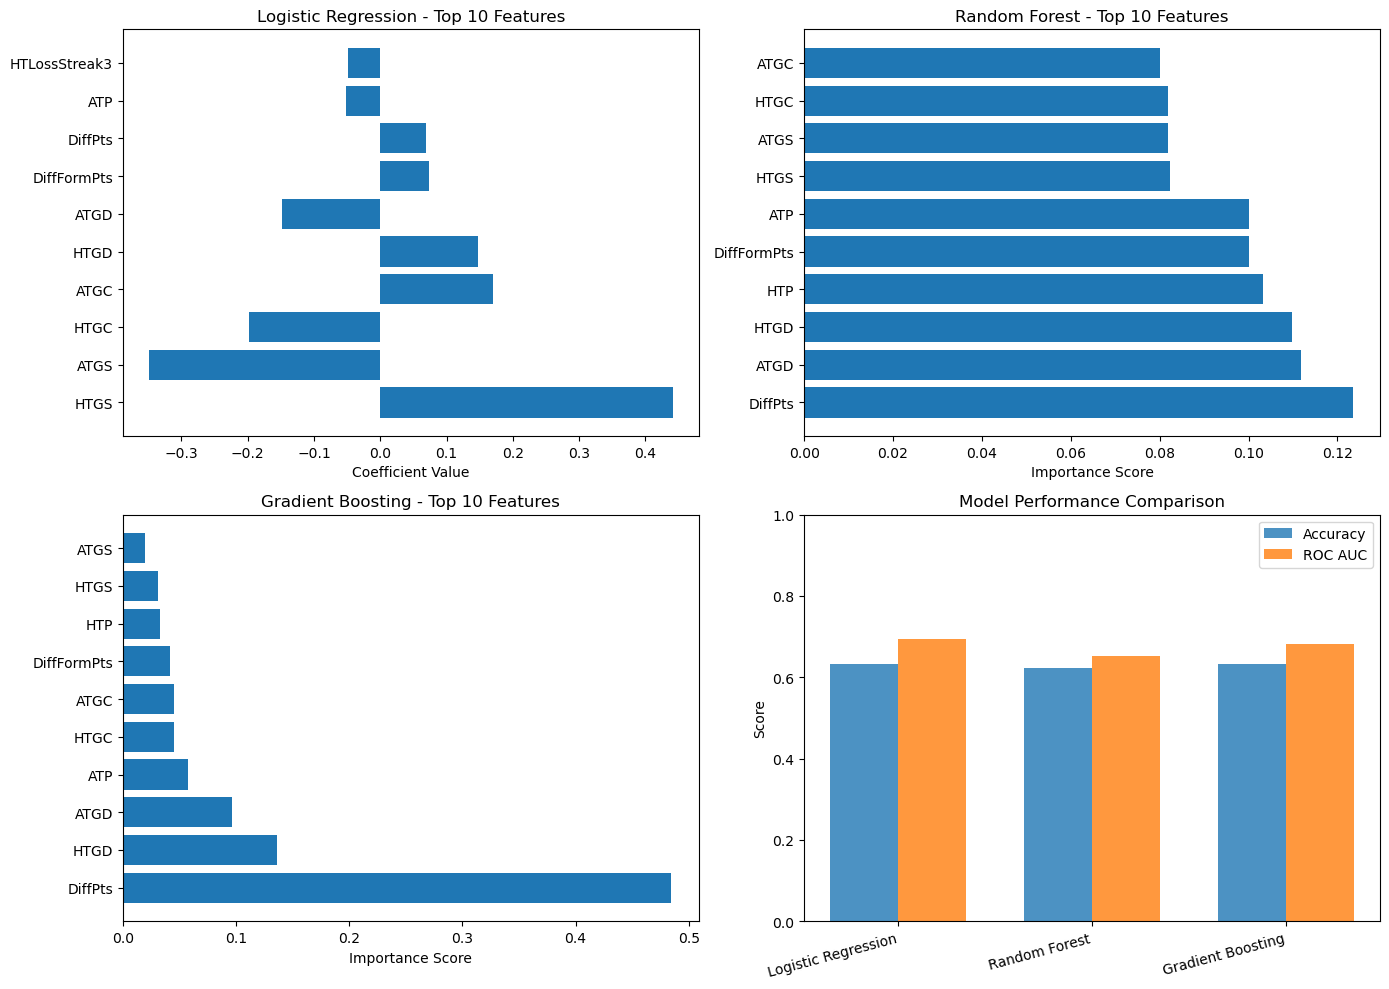


Visualization saved as 'model_analysis.png'


In [9]:
# Feature Importance Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Logistic Regression Coefficients
feature_importance_lr = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False).head(10)

axes[0, 0].barh(feature_importance_lr['feature'], feature_importance_lr['coefficient'])
axes[0, 0].set_title('Logistic Regression - Top 10 Features')
axes[0, 0].set_xlabel('Coefficient Value')

# Random Forest Feature Importance
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

axes[0, 1].barh(feature_importance_rf['feature'], feature_importance_rf['importance'])
axes[0, 1].set_title('Random Forest - Top 10 Features')
axes[0, 1].set_xlabel('Importance Score')

# Gradient Boosting Feature Importance
feature_importance_gb = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

axes[1, 0].barh(feature_importance_gb['feature'], feature_importance_gb['importance'])
axes[1, 0].set_title('Gradient Boosting - Top 10 Features')
axes[1, 0].set_xlabel('Importance Score')

# Model Comparison
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, gb_pred)
]
roc_aucs = [
    roc_auc_score(y_test, lr_pred_proba),
    roc_auc_score(y_test, rf_pred_proba),
    roc_auc_score(y_test, gb_pred_proba)
]

x_pos = np.arange(len(models))
width = 0.35

axes[1, 1].bar(x_pos - width/2, accuracies, width, label='Accuracy', alpha=0.8)
axes[1, 1].bar(x_pos + width/2, roc_aucs, width, label='ROC AUC', alpha=0.8)
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Model Performance Comparison')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(models, rotation=15, ha='right')
axes[1, 1].legend()
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.savefig('model_analysis.png', dpi=100, bbox_inches='tight')
plt.show()

print("\nVisualization saved as 'model_analysis.png'")


LOGISTIC REGRESSION - DETAILED REPORT
               precision    recall  f1-score   support

Away Win/Draw       0.64      0.73      0.68       733
     Home Win       0.63      0.52      0.57       635

     accuracy                           0.63      1368
    macro avg       0.63      0.63      0.63      1368
 weighted avg       0.63      0.63      0.63      1368


RANDOM FOREST - DETAILED REPORT
               precision    recall  f1-score   support

Away Win/Draw       0.63      0.73      0.68       733
     Home Win       0.62      0.50      0.55       635

     accuracy                           0.62      1368
    macro avg       0.62      0.62      0.61      1368
 weighted avg       0.62      0.62      0.62      1368


GRADIENT BOOSTING - DETAILED REPORT
               precision    recall  f1-score   support

Away Win/Draw       0.63      0.76      0.69       733
     Home Win       0.64      0.49      0.55       635

     accuracy                           0.63      1368
   

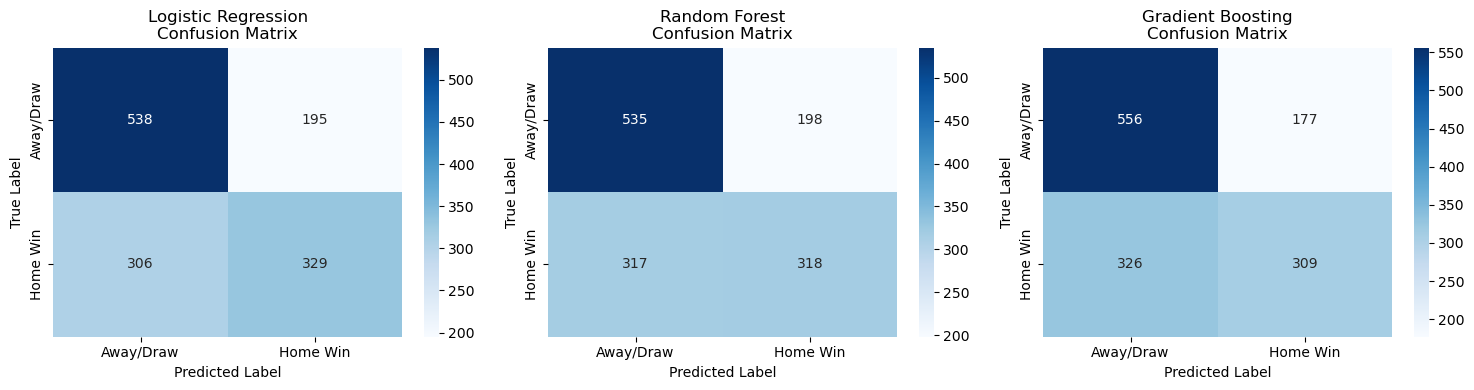


Confusion matrices saved as 'confusion_matrices.png'


In [10]:
# Detailed Classification Reports
print("\n" + "="*60)
print("LOGISTIC REGRESSION - DETAILED REPORT")
print("="*60)
print(classification_report(y_test, lr_pred, target_names=['Away Win/Draw', 'Home Win']))

print("\n" + "="*60)
print("RANDOM FOREST - DETAILED REPORT")
print("="*60)
print(classification_report(y_test, rf_pred, target_names=['Away Win/Draw', 'Home Win']))

print("\n" + "="*60)
print("GRADIENT BOOSTING - DETAILED REPORT")
print("="*60)
print(classification_report(y_test, gb_pred, target_names=['Away Win/Draw', 'Home Win']))

# Confusion Matrices Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

models_list = [
    ('Logistic Regression', y_test, lr_pred),
    ('Random Forest', y_test, rf_pred),
    ('Gradient Boosting', y_test, gb_pred)
]

for idx, (name, y_true, y_pred) in enumerate(models_list):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Away/Draw', 'Home Win'],
                yticklabels=['Away/Draw', 'Home Win'])
    axes[idx].set_title(f'{name}\nConfusion Matrix')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=100, bbox_inches='tight')
plt.show()

print("\nConfusion matrices saved as 'confusion_matrices.png'")

In [12]:
# Save Models and Preprocessors for Streamlit
import pickle
import os

# Create models directory
os.makedirs('models', exist_ok=True)

# Save all models and preprocessors
with open('models/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('models/gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save feature names
with open('models/feature_names.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)

# Save dataset for statistics
df.to_csv('models/dataset.csv', index=False)

# Save feature importance data
with open('models/feature_importance.pkl', 'wb') as f:
    pickle.dump({
        'lr': feature_importance_lr,
        'rf': feature_importance_rf,
        'gb': feature_importance_gb
    }, f)

print("✓ All models saved successfully!")
print("✓ Ready for Streamlit deployment!")
print("\nSaved artifacts:")
print("  - Logistic Regression model")
print("  - Random Forest model")
print("  - Gradient Boosting model")
print("  - StandardScaler")
print("  - Feature names")
print("  - Feature importance data")
print("  - Dataset")

✓ All models saved successfully!
✓ Ready for Streamlit deployment!

Saved artifacts:
  - Logistic Regression model
  - Random Forest model
  - Gradient Boosting model
  - StandardScaler
  - Feature names
  - Feature importance data
  - Dataset
